# Importing Important Libraries

In [1]:
# Data Processing Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Extra Settings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

# Data loading

In [2]:
data=pd.read_csv(r'concrete_data.csv')

In [3]:
# Check the structure of the dataset
print(data.info())

print()
print(data.shape)

# Display the first few rows of the dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None

(1030, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Chedcking for Null and Duplicates

In [4]:
print(data.isnull().sum())
print("\nNumber of duplicates:", data.duplicated().sum())

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

Number of duplicates: 25


In [5]:
# Removing duplicates
data.drop_duplicates(inplace=True)

# Check for duplicate values
data.duplicated().sum()

0

# Visualize the data distribution

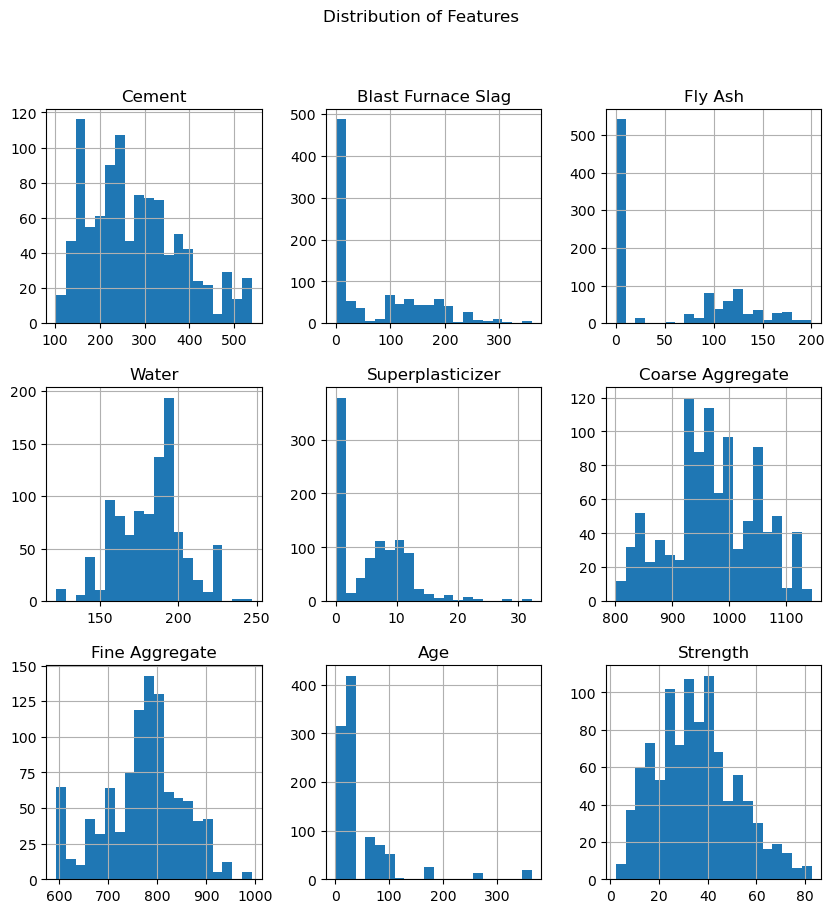

In [6]:
data[data.columns].hist(bins=20, figsize=(10, 10))
plt.suptitle('Distribution of Features')
plt.show()

In [7]:
#  Getting known with the kind of distrubutions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,15))
    fig.suptitle(suptitle,y=0.92, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.distplot(dataset[data], ax=axs[i])
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

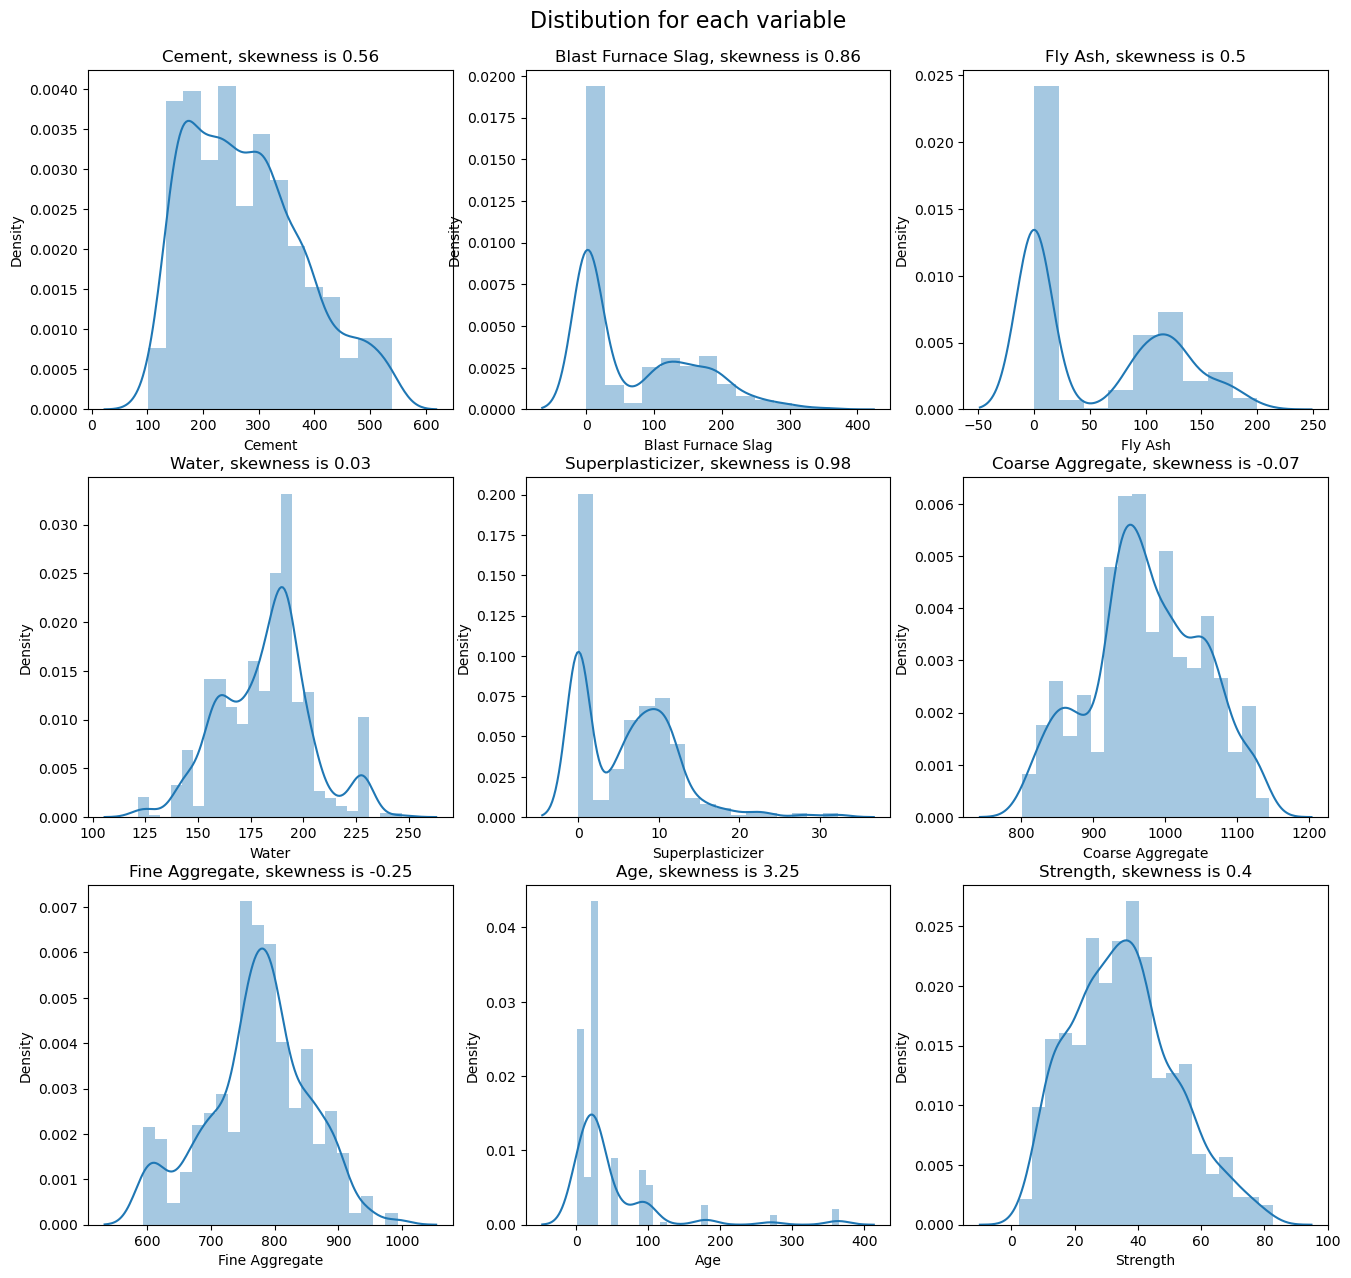

In [8]:
dist_custom(dataset=data, columns_list=data.columns, rows=3, cols=3, suptitle='Distibution for each variable')

# Checking For Outliers

In [9]:
# outliers
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot( data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)

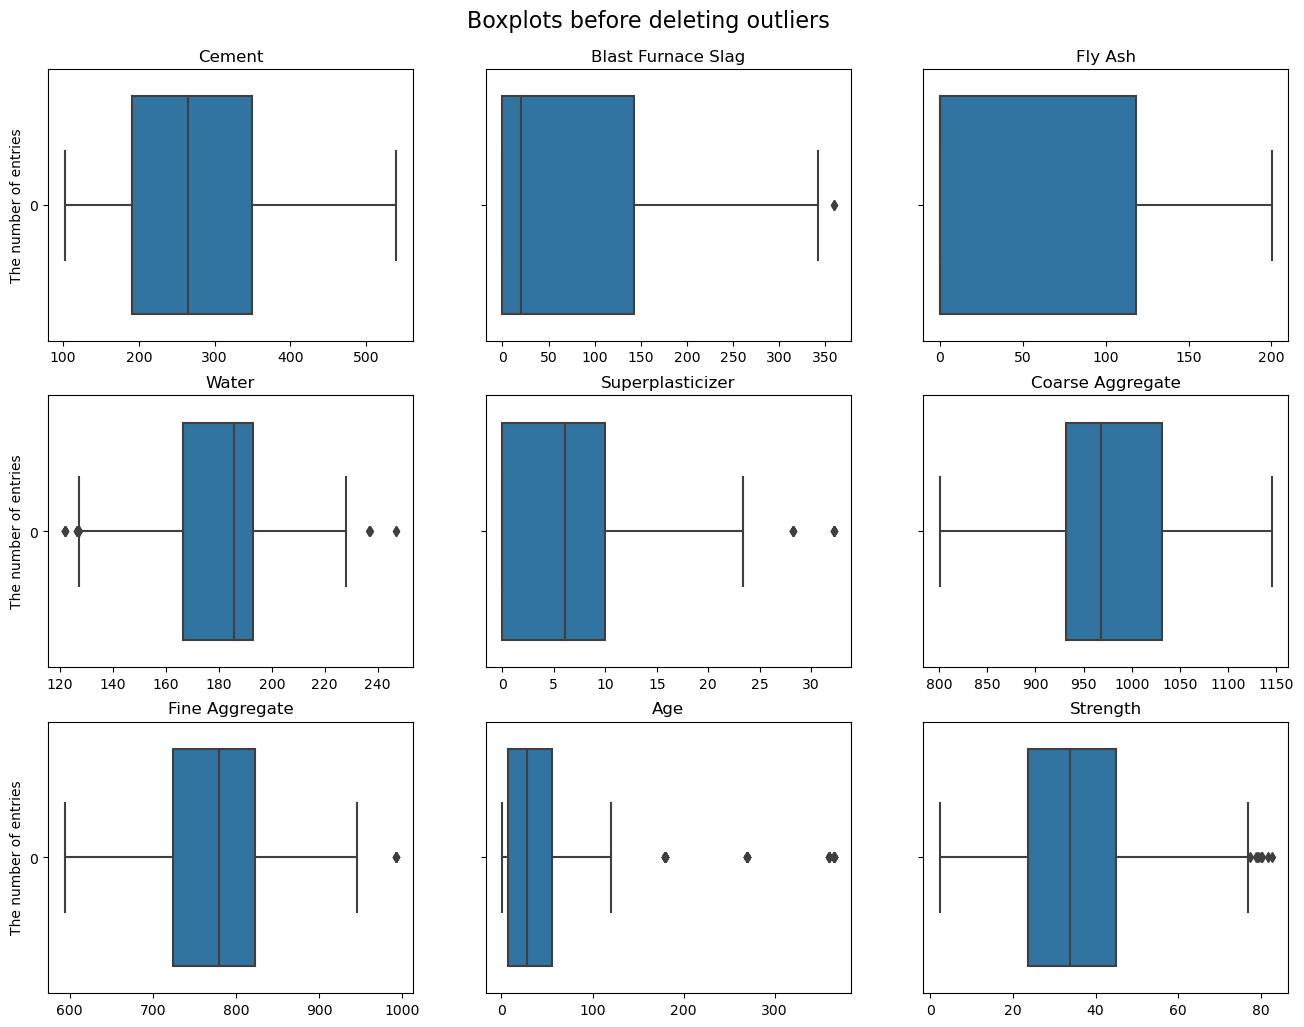

In [10]:
boxplots_custom(dataset=data, columns_list=data.columns, rows=3, cols=3, suptitle='Boxplots before deleting outliers')

# Checking Correlation

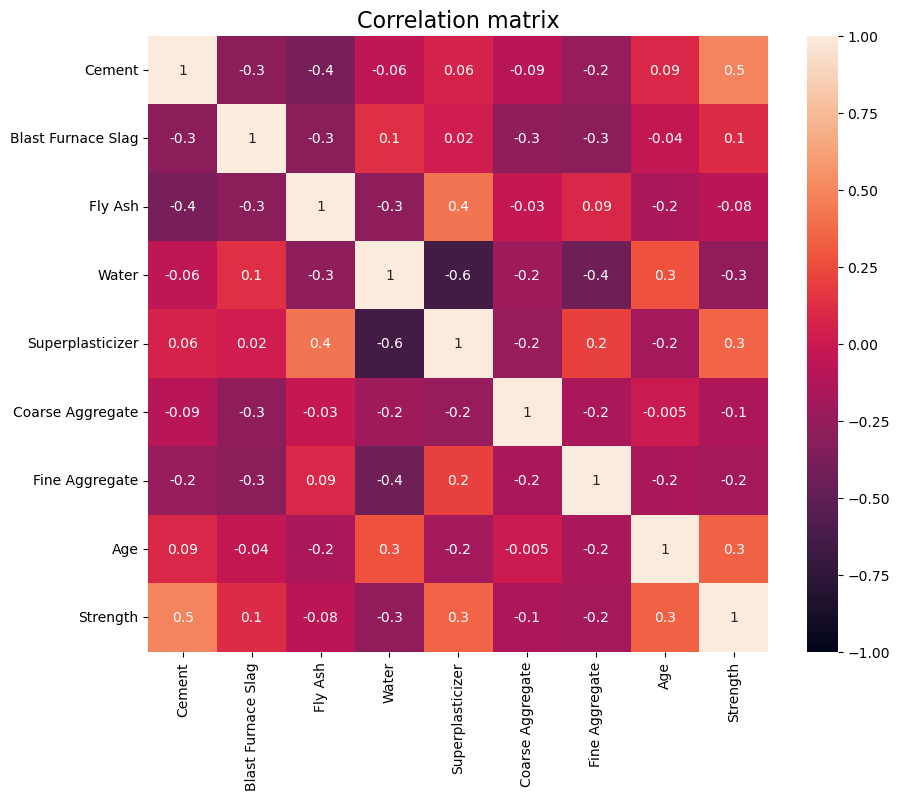

In [11]:
# calculating the correlation matrix
corr = data.corr()
matrix = np.triu(corr)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=1.0, vmin=-1.0, 
            fmt='.1g', annot=True)

plt.title('Correlation matrix', size=16)
plt.show()

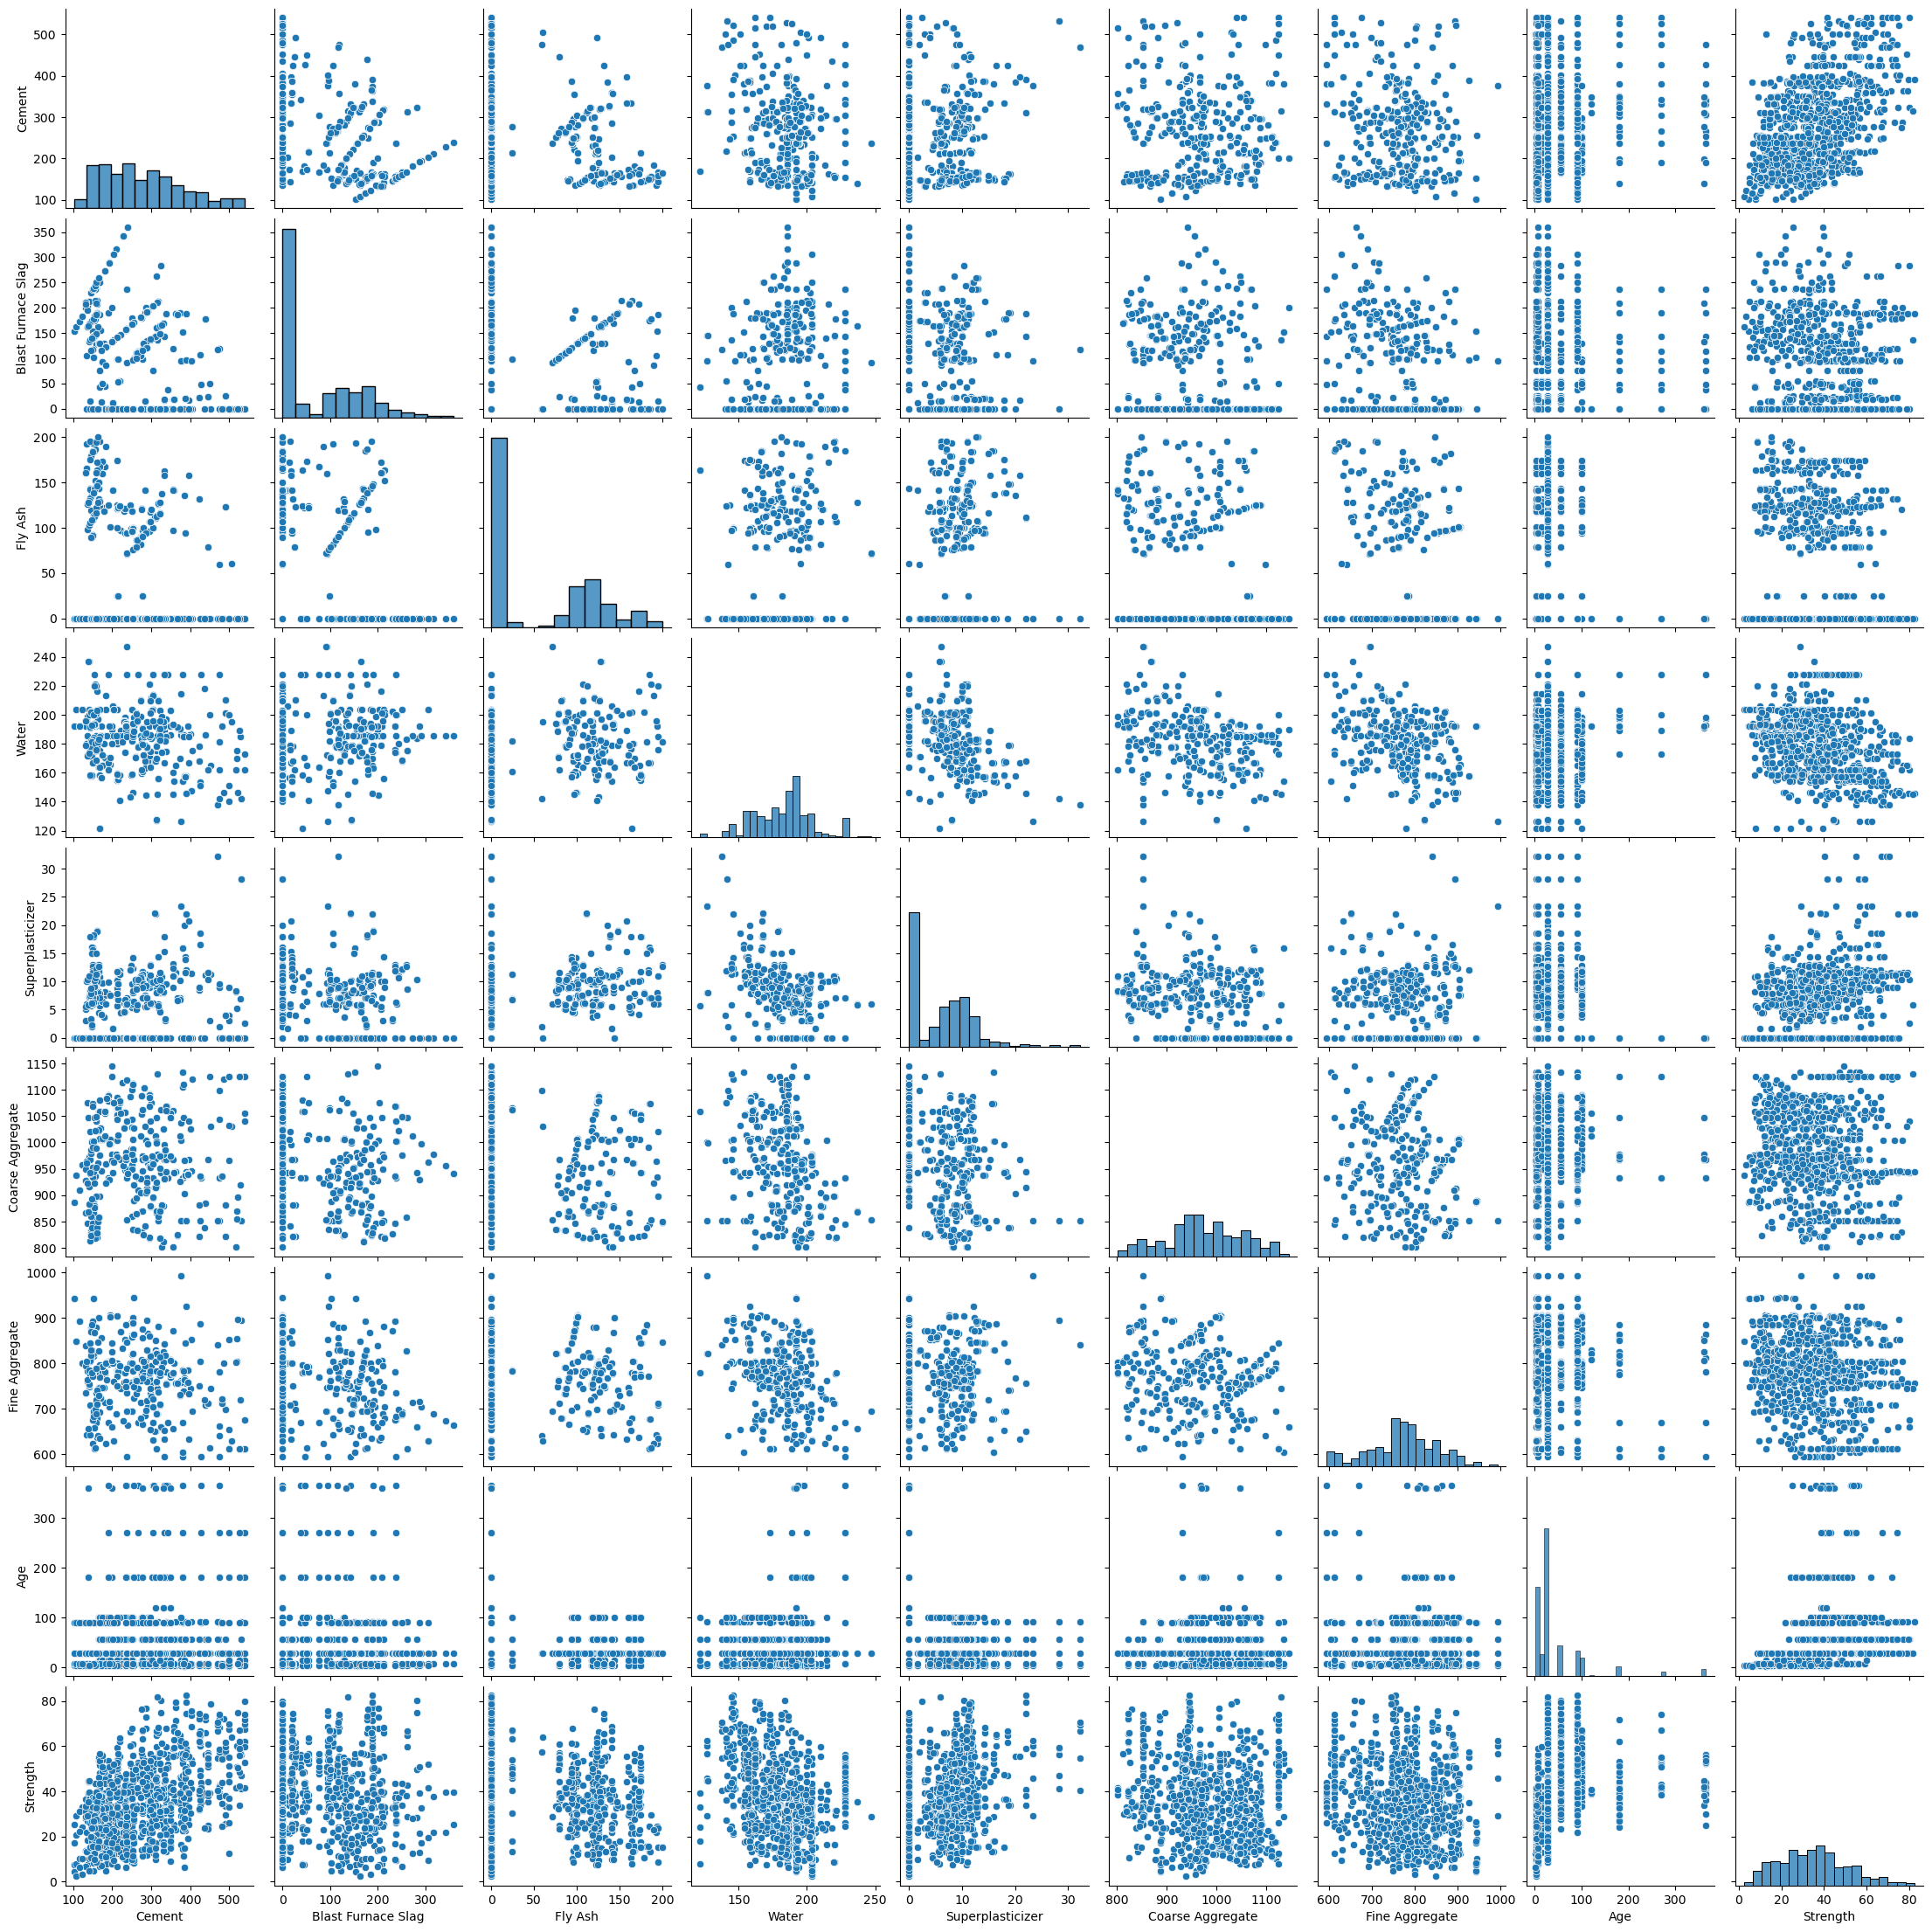

In [12]:
sns.pairplot(data=data,diag_kind="hist")
plt.show()

# Splitting the data

In [13]:
X = data.iloc[:,0:-1].values
Y = data.iloc[:,-1].values

# Split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 10)

In [14]:
print(X.shape)
print()
print(Y.shape)
print()
print(X_train.shape)
print()
print(Y_train.shape)
print()
print(X_test.shape)
print()
print(Y_test.shape)

(1005, 8)

(1005,)

(804, 8)

(804,)

(201, 8)

(201,)


# Scaling the Data

In [15]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =sc.transform(X_test)

# Building layer for the model

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import  callbacks
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Improving the ANN
model = Sequential()
#INPUT LAYER
model.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu', input_shape = [X_train.shape[1]]))

#FIRST HIDDEN LAYER
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dropout(rate=0.25)) 

#SECOND HIDDEN LAYER
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
 

#OUTPUT HIDDEN LAYER
model.add(Dense(units=1, activation='sigmoid'))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 80)                  │             720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,017 (31.32 KB)

 Trainable params: 8,017 (31.32 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling and building the model

In [17]:
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model.fit(X_train , Y_train, batch_size=64 , epochs=100 , validation_split=0.1, verbose = 1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1558.3477 - val_loss: 1401.1290
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1512.8031 - val_loss: 1390.6558
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1438.7992 - val_loss: 1375.9497
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1465.2307 - val_loss: 1371.9677
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1479.1339 - val_loss: 1371.5659
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1461.1771 - val_loss: 1371.5061
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1479.7761 - val_loss: 1371.4899
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1437.5426 - val_loss: 1371.4833
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1426.4434 - val_loss: 1371.4792
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1431.8623 - val_loss: 1371.4763
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1459.0111 - val_loss: 1371.4

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1431.7917 - val_loss: 1371.4580
Epoch 67/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1463.8967 - val_loss: 1371.4580
Epoch 68/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1434.0743 - val_loss: 1371.4580
Epoch 69/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1452.3142 - val_loss: 1371.4580
Epoch 70/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1408.8806 - val_loss: 1371.4580
Epoch 71/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1432.1433 - val_loss: 1371.4580
Epoch 72/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1462.5734 - val_loss: 1371.4580
Epoch 73/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1435.5122 - val_loss: 1371.4580
Epoch 74/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1479.1471 - val_loss: 1371.4580
Epoch 75/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1454.0038 - val_loss: 1371.4580
Epoch 76/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1451.7422 - val_loss: 1371.4578
E

# Ploting the model

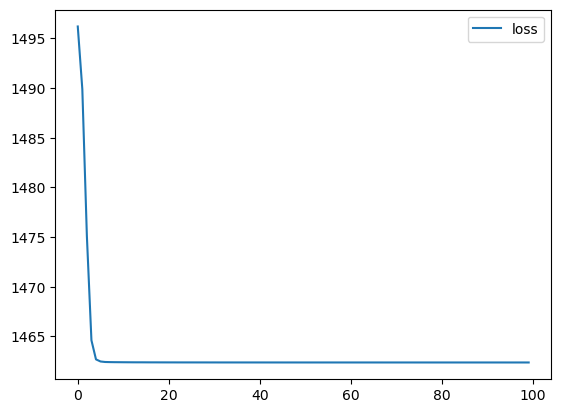

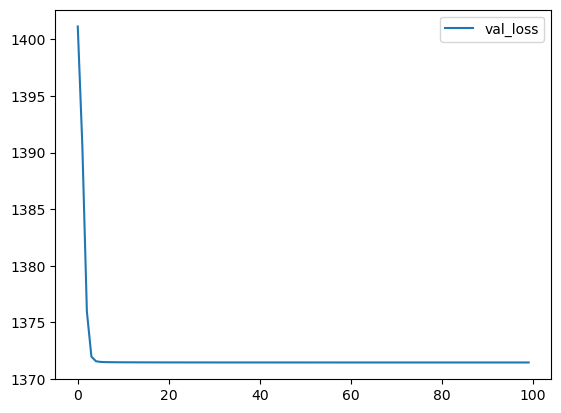

In [18]:
history = pd.DataFrame(history.history)
history.loc[:, ['loss']].plot();
history.loc[:, ['val_loss']].plot();

# Predicting

In [19]:
Y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


-4.525462198806924

# Ploting Actual V/S Prediction

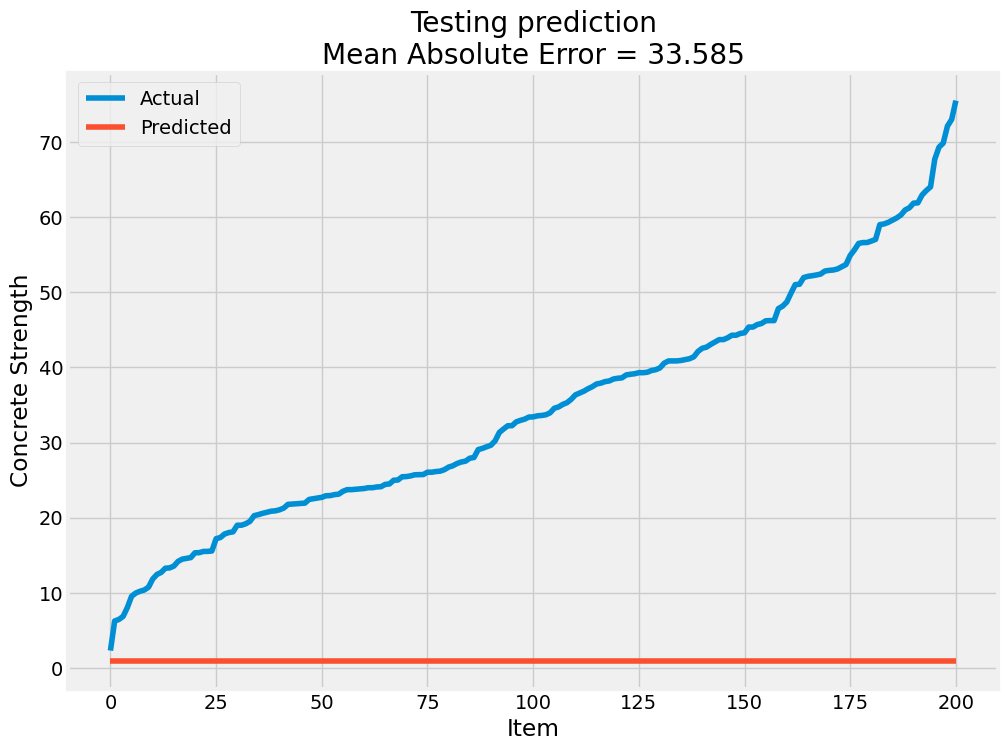

In [20]:
from sklearn.metrics import mean_absolute_error as mae

MAE = mae(Y_test,Y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):

    plt.plot(sorted(Y_test), label='Actual')
    plt.plot(sorted(Y_pred), label='Predicted')
#     plt.fill_between(x=np.arange(0,len(y_pred)),
#                      y1=np.array(sorted(y_pred)+MAE),
#                      y2=sorted(y_pred)-MAE, 
#                      alpha=0.1, color='r', label='MAE')

    plt.title('Testing prediction\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()

# Tunning the model

In [50]:
model1 = keras.Sequential([
    Dense(40 , activation = 'relu' ,kernel_initializer = 'uniform', input_shape = [X_train.shape[1]]),
    Dense(50 , activation = 'relu'),
    Dense(60 , activation = 'relu'),
    Dense(80 , activation = 'relu'),
    Dense(100 , activation = 'relu'),
    Dense(200,activation='relu'),
    Dense(150,activation='relu'),
    Dense(1 , activation = 'linear')
])

In [51]:
# summary of the model
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 40)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 50)                  │           2,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 60)                  │           3,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 80)                  │           4,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 100)                 │           8,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,951 (269.34 KB)

 Trainable params: 68,951 (269.34 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model1.compile(optimizer='Adam', loss = 'mean_squared_error' ,)

history = model1.fit(X_train,Y_train,batch_size=50 , epochs=200 ,validation_split=0.1,verbose = 1,)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1485.1675 - val_loss: 1219.3528
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 951.6063 - val_loss: 397.8596
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 265.2309 - val_loss: 243.3585
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 184.9237 - val_loss: 218.1864
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 167.6261 - val_loss: 201.0062
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 134.4762 - val_loss: 187.2920
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 122.2962 - val_loss: 177.1936
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 127.3935 - val_loss: 167.6859
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 109.1075 - val_loss: 154.9687
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 92.8834 - val_loss: 143.9357
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85.2486 - val_loss: 120.1878
Epoch 12/200
15/15

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.7554 - val_loss: 36.6483
Epoch 69/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.9145 - val_loss: 37.0448
Epoch 70/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0255 - val_loss: 38.5929
Epoch 71/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.8746 - val_loss: 38.5153
Epoch 72/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.8801 - val_loss: 40.8651
Epoch 73/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.1978 - val_loss: 36.5715
Epoch 74/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.6845 - val_loss: 39.0134
Epoch 75/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.6722 - val_loss: 38.7087
Epoch 76/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.6410 - val_loss: 35.6662
Epoch 77/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.2316 - val_loss: 34.0051
Epoch 78/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.3270 - val_loss: 38.3732
Epoch 79/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5077 - val_loss: 39.8459
Epoch 136/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.2424 - val_loss: 36.8231
Epoch 137/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.3685 - val_loss: 39.3001
Epoch 138/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8636 - val_loss: 33.8684
Epoch 139/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9107 - val_loss: 37.4676
Epoch 140/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3332 - val_loss: 38.7744
Epoch 141/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5112 - val_loss: 40.1364
Epoch 142/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0722 - val_loss: 36.5787
Epoch 143/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6537 - val_loss: 35.9749
Epoch 144/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5313 - val_loss: 36.8019
Epoch 145/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5393 - val_loss: 35.6414
Epoch 146/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

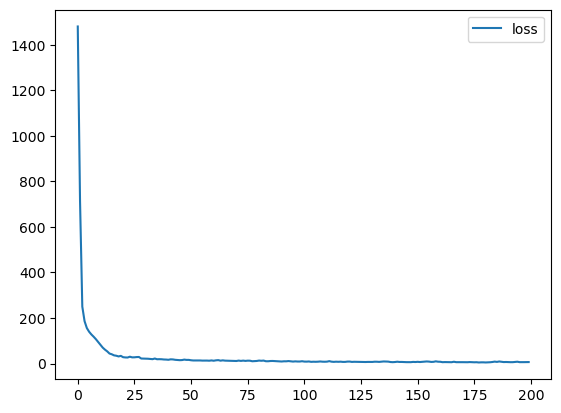

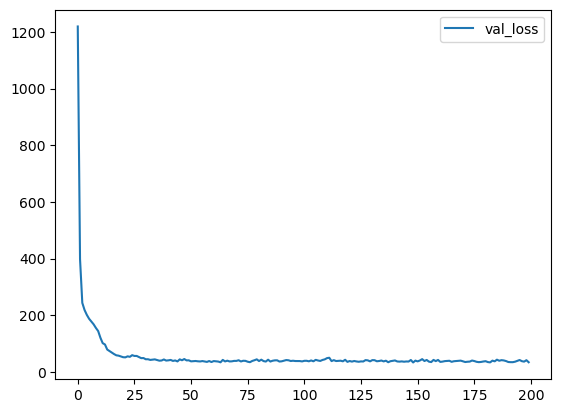

In [53]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot();
history_df.loc[:, ['val_loss']].plot();

In [54]:
Y_pred = model1.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


0.8879446135135654

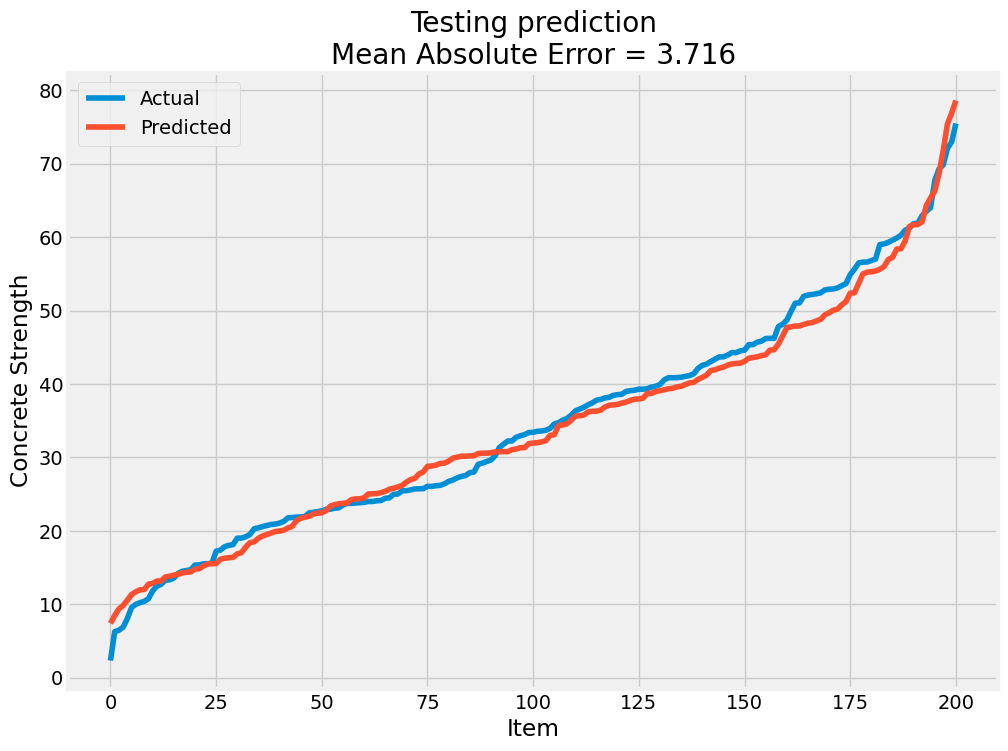

In [55]:
MAE = mae(Y_test,Y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):

    plt.plot(sorted(Y_test), label='Actual')
    plt.plot(sorted(Y_pred), label='Predicted')

    plt.title('Testing prediction\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()

In [56]:
model1.save(r'C:\Users\MIjan\Desktop\ranbom\github project/model1.h5')

In [57]:
import joblib

# Save the model
joblib.dump(model1, r'C:\Users\MIjan\Desktop\ranbom\github project/model1.joblib')

# Load the model
model = joblib.load(r'C:\Users\MIjan\Desktop\ranbom\github project/model1.joblib')